## Learning Plotly

The goal of the plotly.py package is to provide a pleasant Python interface for creating figure specifications which are displayed by the plotly.js JavaScript graphing library.

### Plotly's Python graphing library makes interactive, publication-quality graphs.

In [1]:
# Importing relevant libraries
import plotly as py # Either this
import plotly.graph_objects as go # Or this

### A basic graph with plotly

#### Here is the simple syntax for creating a graph in plotly

In [4]:
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3],x = [1,2,5], )],
    layout_title_text="A basic potly graph" #Naming my graph
)
#fig.show()
# or 
fig


#### You can always get help on the various parameters by using help()
help(py.graph_objects.Figure)  

I find this method very intuitive, but in case of pyplot you get a truckload of information, which is diffiuclt to go through

So you can always go through the official documentation page

### What is a renderer in case of Plotly?

You can think it as the comnination of where and format in which your plot will be displayed.

In many contexts, an appropriate renderer will be chosen automatically and you will not need to perform any additional configuration. 

In [8]:
# renderers available in plotly
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

#### You can set a default rendered as follows

In [53]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"
#pio.orca.config


#### Now let's see how our figure will be rendered

In [49]:
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3],x = [1,2,5])],
    layout_title_text="A basic potly graph" #Naming my graph
)
fig

##### We can see that it opened in a browser window with address  http://127.0.0.1:58138/ which keeps changing.
Lets try one more time

We need orca installed for image formats like png and svg. By default, plotly.py launches the orca server process the first time an image export operation is performed, and then leaves it running until the main Python process exits. Because of this, the first image export operation in an interactive session will typically take a couple of seconds, but then all subsequent export operations will be significantly faster, since the server is already running.

Sometimes you will get an error saying that orca is not installed. All you need to run *'conda install -c plotly plotly-orca'* on your conda prompt

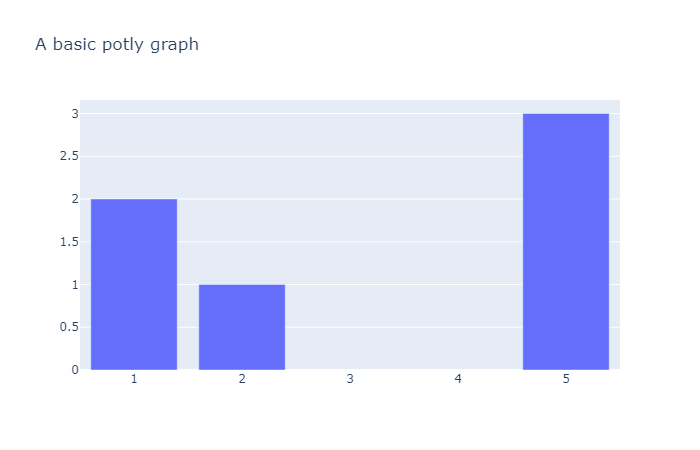

In [53]:
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3],x = [1,2,5])],
    layout_title_text="A basic potly graph" #Naming my graph
)
fig.show(renderer = 'png')

#### The image file can be either written  as a png image on your current path using the below code

In [61]:
fig.write_image("fig1.png")

### Alternate way to create a plotly figure

In [54]:
trace = go.Scatter(x = [1,2,3], y=[3,2,5])
data = [trace]

py.offline.plot(data)


'temp-plot.html'

### Lets try to create a well annonated plot in plotly

In [317]:
# I will try to create a graph with sales for 12 months,and then add different annotations to it

#Monthly sales as bars monthly revenue as line

fig = go.Figure(
    data=[go.Scatter(y=[29, 24, 27, 22, 17, 12, 16, 19, 28, 33, 35, 39], x = [1,2,3,4,5,6,7,8,9,10,11,12], 
                     #mode = 'lines', 
                     name = 'Revenue', marker = dict(symbol = "circle", color = 'darkblue', size = 6),
                     #showlegend = False, 
                     hovertext = 'Revenue is here',
                     hoveron = 'fills+points'
                   ),
         go.Bar(y=[30, 27, 28, 24, 19, 15, 18, 21, 28, 32, 35, 39], x = [1,2,3,4,5,6,7,8,9,10,11,12], 
                    name = 'Sales',marker=dict(color="deepskyblue"),
               hovertext = 'Sales for the month',
               hoverinfo ='y+x+text'
               )]
)

# Update layout is an easy way to add or make changes to the graphs
## Changing x and y tick marks
fig.update_layout(
    xaxis = dict(
        title = dict(text = "Month"),
        tickmode = 'array',
        tickvals = [1,2,3,4,5,6,7,8,9,10,11,12],
        ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    yaxis = dict(title = dict(text = 'Revenue'))
)

## Updating the title
fig.update_layout(
    title={
        'text': "Sales and Revenue",
        'font': {'family': 'Balto', 'size' : 25, 'color':'Black' },
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'xref': 'container'
        #'xref' : 'paper'
    }
)


## Editing Legends
fig.update_layout(
    legend ={
        'bgcolor': "LightBlue",
        'bordercolor': 'Darkblue',
        'orientation': 'v',
        'itemclick' : 'toggleothers',
        'xanchor' : 'left',
        'yanchor' : 'top'
     },
    plot_bgcolor = 'white'
)


## Adding an image to the graph
fig.add_layout_image(
        dict(
            source="Bart3.png",
            xref="x",
            yref="y",
            x=8,
            y=43,
            sizex=3,
            sizey=14,
            sizing="stretch",
            opacity=1,
            layer="above")
)


fig.show(renderer = 'notebook_connected')

